In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, power_transform, PolynomialFeatures

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
target = pd.Series(boston['target'])

In [10]:
df['PRICE'] = target

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
## Graphical Summary => Analisa Univariate maupun Multivariate yg menggunakan Plot?Grafik

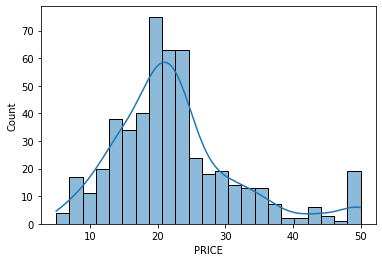

In [13]:
sns.histplot(df['PRICE'], kde=True);

In [14]:
from scipy.stats import normaltest

In [15]:
normaltest(df['PRICE'])

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

In [16]:
# Karena P value Kurang dari 0.05 bisa kita asumsikan Distribusi PRICE tidak normal

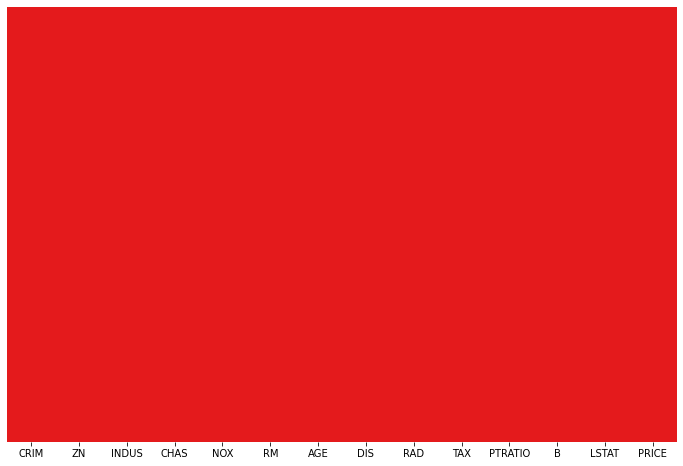

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='Set1');

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


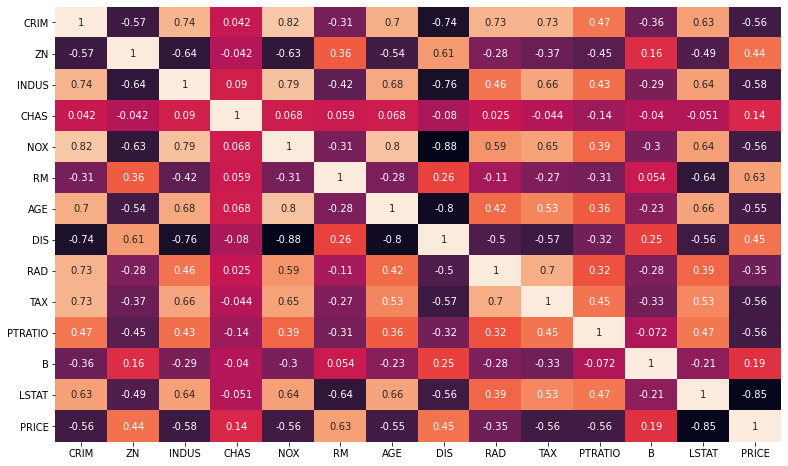

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr('spearman'), annot=True, cbar=False);

In [21]:
df.corr('spearman')['PRICE']

CRIM      -0.558891
ZN         0.438179
INDUS     -0.578255
CHAS       0.140612
NOX       -0.562609
RM         0.633576
AGE       -0.547562
DIS        0.445857
RAD       -0.346776
TAX       -0.562411
PTRATIO   -0.555905
B          0.185664
LSTAT     -0.852914
PRICE      1.000000
Name: PRICE, dtype: float64

In [22]:
df_1 = df.drop(columns=['CHAS', 'B', 'RAD'])

In [23]:
X = df_1.drop(columns='PRICE')
y = df_1['PRICE']

In [24]:
## Splitting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [26]:
X_train.shape

(404, 10)

In [27]:
X_test.shape

(102, 10)

In [28]:
## Scalling

In [29]:
rbs = RobustScaler()
rbs.fit(X_train)

RobustScaler()

In [30]:
X_train_scaled = rbs.transform(X_train)
X_test_scaled = rbs.transform(X_test)

In [31]:
## Modelling

In [32]:
## Evaluation Function
def Eva_Func(Model, X_train, y_train, X_test, y_test, Name):
    y_tr = Model.predict(X_train)
    y_ts = Model.predict(X_test)
    MAE_tr = mean_absolute_error(y_train, y_tr)
    MSE_tr = mean_squared_error(y_train, y_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    R2_tr = r2_score(y_train, y_tr)
    MedAE_tr = median_absolute_error(y_train, y_tr) ## Jika ada Error yg Outliers Gunakan MedAE
    MAE_ts = mean_absolute_error(y_test, y_ts)
    MSE_ts = mean_squared_error(y_test, y_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    R2_ts = r2_score(y_test, y_ts)
    MedAE_ts = median_absolute_error(y_test, y_ts)
    data = {
        f"Train {Name}" : [R2_tr, MAE_tr, MSE_tr, RMSE_tr, MedAE_tr],
        f"Test {Name}" : [R2_ts, MAE_ts, MSE_ts, RMSE_ts, MedAE_ts]
    }
    df = pd.DataFrame(data, index=['R2', 'MAE', 'MSE', 'RMSE', 'MedAE'])
    return df

In [33]:
## Base Model

In [34]:
KNN_1 = KNeighborsRegressor()

In [35]:
KNN_1.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
df_KNN_base = Eva_Func(KNN_1, X_train, y_train, X_test, y_test, "Base KNN")
df_KNN_base

,Train Base KNN,Test Base KNN
R2,0.733278,0.667554
MAE,3.353020,3.213922
MSE,23.171070,24.379557
RMSE,4.813634,4.937566
MedAE,2.210000,2.140000


In [37]:
SVM_1 = SVR(max_iter=500)

In [38]:
SVM_1.fit(X_train, y_train)

SVR(max_iter=500)

In [39]:
df_SVM_base = Eva_Func(SVM_1, X_train, y_train, X_test, y_test, "Base SVM")
df_SVM_base

,Train Base SVM,Test Base SVM
R2,0.172344,0.275254
MAE,5.516663,4.485782
MSE,71.901313,53.148347
RMSE,8.479464,7.290291
MedAE,3.743932,3.216399


In [40]:
DT_1 = DecisionTreeRegressor()

In [41]:
DT_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
df_DT_base = Eva_Func(DT_1, X_train, y_train, X_test, y_test, "Base DT")
df_DT_base

,Train Base DT,Test Base DT
R2,1.0,0.706541
MAE,0.0,2.642157
MSE,0.0,21.520490
RMSE,0.0,4.639018
MedAE,0.0,1.750000


In [43]:
RF_1 = RandomForestRegressor()

In [44]:
RF_1.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
df_RF_base = Eva_Func(RF_1, X_train, y_train, X_test, y_test, "Base RF")
df_RF_base

,Train Base RF,Test Base RF
R2,0.975835,0.877354
MAE,0.894394,2.062990
MSE,2.099316,8.994122
RMSE,1.448902,2.999020
MedAE,0.577500,1.557500


In [46]:
### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
LinReg = LinearRegression(fit_intercept=False)

In [49]:
LinReg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [50]:
df_LinReg = Eva_Func(LinReg, X_train, y_train, X_test, y_test, "LinReg")
df_LinReg

,Train LinReg,Test LinReg
R2,0.702496,0.594961
MAE,3.440059,3.465439
MSE,25.845205,29.703062
RMSE,5.083818,5.450052
MedAE,2.461195,2.333454


In [51]:
### Improvement

In [52]:
# KNN Hyper Parameter Tuning

In [53]:
ModelKNN = KNeighborsRegressor()

In [54]:
param_KNN = {
    "n_neighbors" : np.arange(1, 51, 2),
    "weights" : ['uniform', 'distance'],
    "p" : [2, 1],
}

In [55]:
GS_KNN = GridSearchCV(ModelKNN, param_KNN, cv=3, n_jobs=-1, verbose=1, scoring="r2")

In [56]:
GS_KNN.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.5s finished


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [57]:
KNN_Tuned = GS_KNN.best_estimator_

In [58]:
df_KNN_Tuned = Eva_Func(KNN_Tuned, X_train_scaled, y_train, X_test_scaled, y_test, "KNN Tuned")
df_KNN_Tuned

,Train KNN Tuned,Test KNN Tuned
R2,1.0,0.830497
MAE,0.0,2.366720
MSE,0.0,12.430301
RMSE,0.0,3.525663
MedAE,0.0,1.828691


In [59]:
df_KNN_base

,Train Base KNN,Test Base KNN
R2,0.733278,0.667554
MAE,3.353020,3.213922
MSE,23.171070,24.379557
RMSE,4.813634,4.937566
MedAE,2.210000,2.140000


In [60]:
pd.concat([df_KNN_base, df_KNN_Tuned], axis=1)

,Train Base KNN,Test Base KNN,Train KNN Tuned,Test KNN Tuned
R2,0.733278,0.667554,1.0,0.830497
MAE,3.353020,3.213922,0.0,2.366720
MSE,23.171070,24.379557,0.0,12.430301
RMSE,4.813634,4.937566,0.0,3.525663
MedAE,2.210000,2.140000,0.0,1.828691


In [61]:
## SVM Hyper Parameter Tuning

In [62]:
ModelSVM = SVR(max_iter=500)

In [63]:
param_SVM ={
    "C" :np.arange(1, 5, 0.2),
    "gamma" : np.arange(1, 11)
}

In [64]:
GS_SVM = GridSearchCV(ModelSVM, param_SVM, cv=3, n_jobs=-1, verbose=1, scoring='r2')

In [65]:
GS_SVM.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.0s finished
C:\Users\Kal\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=3, estimator=SVR(max_iter=500), n_jobs=-1,
             param_grid={'C': array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8]),
                         'gamma': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2', verbose=1)

In [66]:
GS_SVM.best_params_

{'C': 4.799999999999999, 'gamma': 1}

In [67]:
GS_SVM.best_params_

{'C': 4.799999999999999, 'gamma': 1}

In [68]:
SVM_Tuned = GS_SVM.best_estimator_

In [69]:
df_SVM_Tuned = Eva_Func(SVM_Tuned, X_train_scaled, y_train, X_test_scaled, y_test, "SVM Tuned")
df_SVM_Tuned

,Train SVM Tuned,Test SVM Tuned
R2,0.818496,0.609893
MAE,1.833266,2.903755
MSE,15.767909,28.608039
RMSE,3.970883,5.348648
MedAE,0.403002,1.505662


In [70]:
pd.concat([df_SVM_base, df_SVM_Tuned], axis=1)

,Train Base SVM,Test Base SVM,Train SVM Tuned,Test SVM Tuned
R2,0.172344,0.275254,0.818496,0.609893
MAE,5.516663,4.485782,1.833266,2.903755
MSE,71.901313,53.148347,15.767909,28.608039
RMSE,8.479464,7.290291,3.970883,5.348648
MedAE,3.743932,3.216399,0.403002,1.505662


In [71]:
### Decision Tree Hyper Parameter Tuning

In [72]:
ModelDT = DecisionTreeRegressor()

In [73]:
param_DT = {
    "max_depth" : [None, 5, 15, 20, 25],
    "min_samples_leaf": np.arange(1, 20, 3),
    "max_features" : np.arange(0.1, 1.1, 0.1),
}

In [74]:
GS_DT = GridSearchCV(ModelDT, param_DT, n_jobs=-1, cv=3, verbose=1, scoring="r2")

In [75]:
GS_DT.fit(X_train, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    1.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 15, 20, 25],
                         'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19])},
             scoring='r2', verbose=1)

In [76]:
GS_DT.best_params_

{'max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 4}

In [77]:
DT_Tuned = GS_DT.best_estimator_

In [78]:
df_DT_Tuned = Eva_Func(DT_Tuned, X_train, y_train, X_test, y_test, "DT Tuned")
df_DT_Tuned

,Train DT Tuned,Test DT Tuned
R2,0.890336,0.687037
MAE,2.054410,3.437955
MSE,9.526903,22.950793
RMSE,3.086568,4.790699
MedAE,1.290000,2.510000


In [79]:
pd.concat([df_DT_base, df_DT_Tuned], axis=1)

,Train Base DT,Test Base DT,Train DT Tuned,Test DT Tuned
R2,1.0,0.706541,0.890336,0.687037
MAE,0.0,2.642157,2.054410,3.437955
MSE,0.0,21.520490,9.526903,22.950793
RMSE,0.0,4.639018,3.086568,4.790699
MedAE,0.0,1.750000,1.290000,2.510000


In [80]:
### Random Forest Hyper Parameter Tuning

In [81]:
ModelRF = RandomForestRegressor(random_state=42)

In [85]:
param_RF = {
    "n_estimators" : [100, 200, 300, 400, 500], #5
    "max_depth" : [None, 5, 15, 20, 25], #5
    "min_samples_leaf": [ 1,  4,  7, 10, 13], #7
    "max_features" : [0.3, 0.5, 0.7, 0.8], #4
}

In [86]:
GS_RF = GridSearchCV(ModelRF, param_RF, cv=3, n_jobs=-1, verbose=1, scoring="r2")

In [87]:
GS_RF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.0min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 15, 20, 25],
                         'max_features': [0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': [1, 4, 7, 10, 13],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [88]:
GS_RF.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [89]:
RF_Tuned = GS_RF.best_estimator_

In [90]:
df_RF_Tuned = Eva_Func(RF_Tuned, X_train, y_train, X_test, y_test, "RF Tuned")
df_RF_Tuned

,Train RF Tuned,Test RF Tuned
R2,0.980439,0.886293
MAE,0.849160,1.929289
MSE,1.699362,8.338560
RMSE,1.303596,2.887657
MedAE,0.545000,1.390250


In [113]:
df_RF = pd.concat([df_RF_base, df_RF_Tuned], axis=1)

In [ ]:
## Hyper parameter Tuning menggunakan randomized Search

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
RF_2 = RandomForestRegressor(random_state=42)

In [103]:
param_RF2 = {
    "n_estimators" : np.arange(100, 1001, 100), #9
    "max_depth" : np.arange(5, 100), #95
    "min_samples_leaf": np.arange(1,51,2), #7
    "max_features" : np.arange(0.1, 1.1, 0.1), #4
}

In [107]:
RS_RF = RandomizedSearchCV(RF_2, param_RF2, cv=3, n_iter=30, n_jobs=-1, verbose=1, random_state=42, scoring='r2')

In [108]:
RS_RF.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900,

In [109]:
RS_RF.best_params_

{'n_estimators': 700,
 'min_samples_leaf': 3,
 'max_features': 0.4,
 'max_depth': 72}

In [110]:
RS_RF.predict(X_test)

array([24.0894125 , 31.57923153, 16.69695609, 23.66090698, 16.13925858,
       21.78764939, 19.05965124, 15.50908052, 20.90537564, 20.71041149,
       19.9931947 , 19.69540119,  8.57082392, 21.78037971, 20.09577684,
       25.00538019, 18.90147106,  9.27654882, 43.42869948, 14.85673965,
       25.10486983, 24.99610856, 14.48716085, 22.38871298, 14.5906044 ,
       15.24680214, 21.83305858, 15.09061726, 20.12936746, 21.04623985,
       20.6734649 , 23.53116818, 23.21072954, 20.20791074, 15.08792898,
       16.30557335, 36.08039435, 19.42345546, 21.43859489, 23.93276633,
       18.63886748, 30.06606673, 43.84183454, 19.36202834, 23.58800295,
       13.99491173, 15.14789894, 24.13249965, 17.93716336, 28.1763086 ,
       20.72546156, 34.40448863, 15.98800228, 25.00478396, 44.76370905,
       21.41892223, 15.86688169, 32.3747916 , 22.80617135, 19.25850175,
       24.7883368 , 33.5158998 , 30.85398986, 18.87327857, 26.21192554,
       17.78892843, 13.82216475, 23.40914006, 29.06093949, 16.78

In [111]:
RF_Tuned2 = RS_RF.best_estimator_

In [112]:
df_RF_Tuned2 = Eva_Func(RF_Tuned2, X_train, y_train, X_test, y_test, "RF Tuned2")
df_RF_Tuned2

,Train RF Tuned2,Test RF Tuned2
R2,0.941984,0.856712
MAE,1.386966,2.011154
MSE,5.040013,10.507858
RMSE,2.244997,3.241583
MedAE,0.882393,1.471009


In [114]:
pd.concat([df_RF, df_RF_Tuned2], axis=1)

,Train Base RF,Test Base RF,Train RF Tuned,Test RF Tuned,Train RF Tuned2,Test RF Tuned2
R2,0.975835,0.877354,0.980439,0.886293,0.941984,0.856712
MAE,0.894394,2.062990,0.849160,1.929289,1.386966,2.011154
MSE,2.099316,8.994122,1.699362,8.338560,5.040013,10.507858
RMSE,1.448902,2.999020,1.303596,2.887657,2.244997,3.241583
MedAE,0.577500,1.557500,0.545000,1.390250,0.882393,1.471009


In [117]:
fi = RF_Tuned2.feature_importances_

In [116]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [119]:
pd.DataFrame(fi, index=X_train.columns, columns=['Feature Importances']).sort_values('Feature Importances')

,Feature Importances
ZN,0.003447
AGE,0.021124
TAX,0.025618
INDUS,0.045894
DIS,0.049535
PTRATIO,0.056584
NOX,0.058172
CRIM,0.059003
LSTAT,0.326638
RM,0.353984
